**Project Description**

Here we will predict the quality of wine on the basis of given features. We use the wine quality dataset available on Internet for free. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine

**Importing libraries and Dataset:**
*   **Pandas** is a useful library in data handling.
*   **Seaborn/Matplotlib** are used for data visualisation purpose.
*   **Numpy** library used for working with arrays.
*   **Sklearn** – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
*  **XGBoost** – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

**first five rows of the dataset**

In [2]:
df = pd.read_csv('winequalityN.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

**type of data present in each of the columns present in the dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**descriptive statistical measures of the dataset**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


**Exploratory Data Analysis**

In [5]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

**impute the missing values by means as the data present in the different columns are continuous values**

In [6]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col]=df[col].fillna(df[col].mean())

df.isnull().sum().sum()

0

**histogram to visualise the distribution of the data with continuous values in the columns of the dataset**

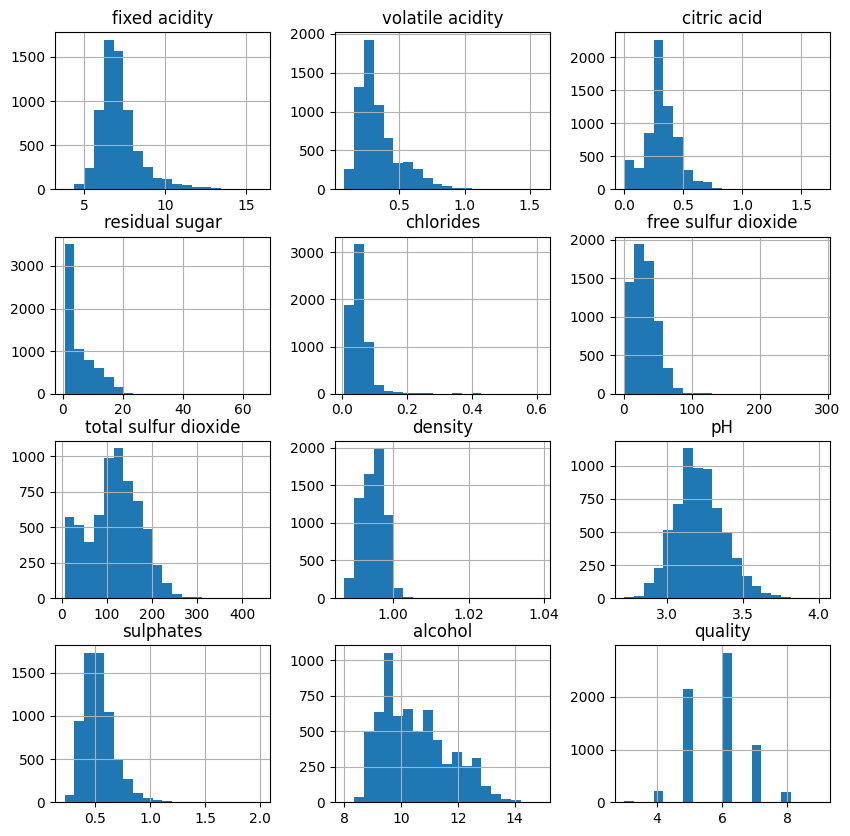

In [7]:
df.hist(bins=20, figsize=(10,10))
plt.show()

**count plot to visualise the number data for each quality of wine**

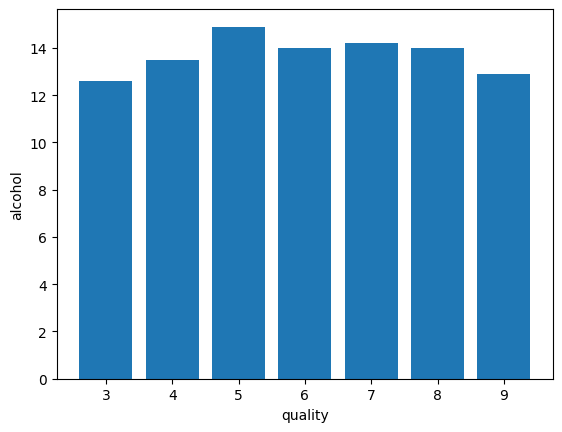

In [8]:
plt.bar(df["quality"], df["alcohol"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

**remove redundant features before using them to train our model**

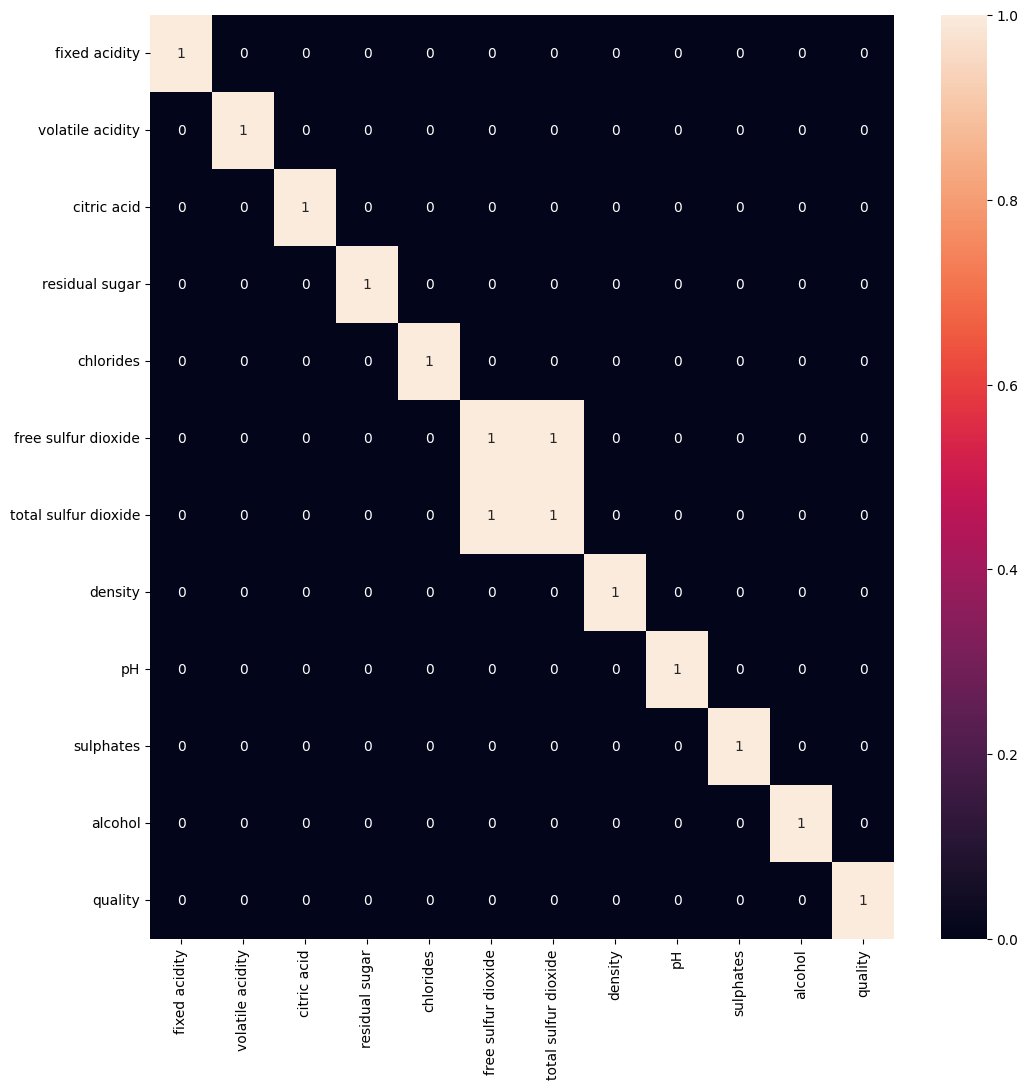

In [9]:
plt.figure(figsize=(12,12))
sb.heatmap(df.corr()>0.7, annot=True, cbar="False")
plt.show()

**‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them**

In [10]:
df = df.drop("total sulfur dioxide", axis = 1)

**Model Development**

In [12]:
df["best quality"] = [1 if x>5 else 0 for x in df.quality]

**We have a column with object data type as well let’s replace it with the 0 and 1 as there are only two categories**

In [14]:
df.replace({"white":1, "red":0}, inplace=True)

**After segregating features and the target variable from the dataset we will split it into 80:20 ratio for model selection**

In [16]:
features=df.drop(["quality","best quality"], axis=1)
target = df["best quality"]

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40
)

xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

**Normalising the data before training help us to achieve stable and fast training of the model**

In [17]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

**As the data has been prepared completely let’s train some state of the art machine learning model on it**

In [20]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = "rbf")]

for i in range(3):
  models[i].fit(xtrain, ytrain)

  print(f"{models[i]}:")
  print("Training Accuracy:", metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
  print("Validation Accuracy:", metrics.roc_auc_score(ytest, models[i].predict(xtest)))
  print()

LogisticRegression():
Training Accuracy: 0.7019709565048414
Validation Accuracy: 0.6937888865050418

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...):
Training Accuracy: 0.9758950458493477
Validation Accuracy: 0.7893666799481003

SVC():
Training Accuracy: 0.7069199304892986
Validation Accuracy: 0

**Model Evaluation**

In [23]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       474
           1       0.84      0.87      0.86       826

    accuracy                           0.81      1300
   macro avg       0.80      0.79      0.79      1300
weighted avg       0.81      0.81      0.81      1300

